# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

I would define the most profitable item as the one with the highest average profit margin, which is calculated as the difference between 'State Bottle Retail' and 'State Bottle Cost'. This metric indicates how much profit the state makes on each bottle sold, and focusing on average values helps to account for variations in sales volume across different items. By identifying items with high profit margins, we can prioritize those that contribute most significantly to overall profitability.

In [83]:
import pandas as pd

iowa_df = pd.read_csv('data/iowa.csv', low_memory=False)

iowa_df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


In [84]:
iowa_df.groupby(by="Item Description").agg({'State Bottle Retail': 'mean', 'State Bottle Cost': 'mean'})

,State Bottle Retail,State Bottle Cost
Item Description,,
"""JOSE CUERVO SILVER """"ROLLING STONES""""""",15.750,10.500
"""RUMCHATA """"MINICHATAS"""" CREAMER CUPS""",10.500,7.000
10 CANE RUM,18.745,12.495
10TH MOUNTAIN CORDIAL,37.500,25.000
135� EAST HYOGO JAPANESE DRY GIN,25.010,16.670
...,...,...
ZING ZANG BLAZING BLOODY MARY RTS,12.470,8.310
ZING ZANG BLOODY MARY RTS,12.470,8.310
ZIYAD LEMON RUSH,12.000,8.000


# Profitability Calculation

In [85]:
iowa_df['Profit Margin'] = iowa_df['State Bottle Retail'] - iowa_df['State Bottle Cost']

profit_df = iowa_df.groupby('Item Description').agg({'Profit Margin': 'mean'}).reset_index()

top_profit_df = profit_df.sort_values(by='Profit Margin', ascending=False).head(10)
top_profit_df.head(5)

,Item Description,Profit Margin
4026,REMY MARTIN LOUIS XIII,1149.42
2210,HA GLENFIDDICH 30YR,406.67
2271,HA RABBIT HOLE MIZUNARA,374.83
3109,MACALLAN SHERRY CASK 25 YEAR OLD SCOTCH - HA,281.70
2209,HA GLENFIDDICH 26YR GRANDE COURONNE,183.34


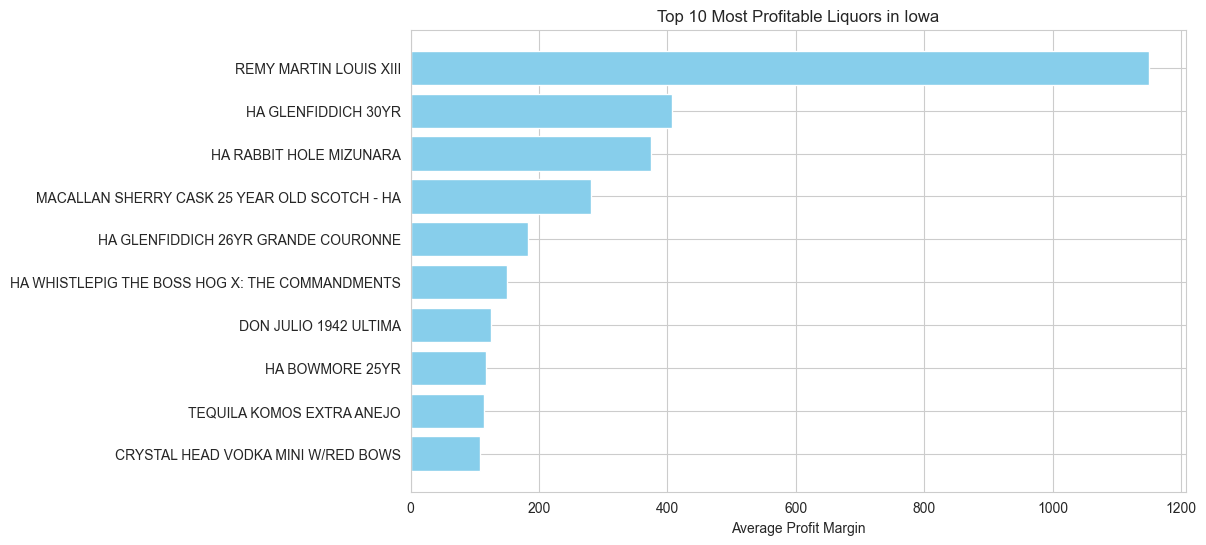

In [86]:
# Plotting the Top 10 Most Profitable Liquors
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(top_profit_df['Item Description'], top_profit_df['Profit Margin'], color='skyblue')
plt.xlabel('Average Profit Margin')
plt.title('Top 10 Most Profitable Liquors in Iowa')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest profit
plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [87]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [88]:
x.reshape(-1,1)-y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

Reshaping with `-1` allows NumPy to automatically determine the appropriate dimension size based on the original array's size. The array is reshaped into a column vector with 3 rows and 1 column and a row vector with 1 row and 2 columns, respectively. This setup enables broadcasting to perform element-wise operations between the two arrays, resulting in a 3x2 matrix where each element represents the difference between elements of `x` and `y`.

In [89]:
x.reshape(1,-1)-y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

The array was just transposed. Now `x` is a row vector with 1 row and 3 columns, and `y` is a column vector with 2 rows and 1 column.

In [90]:
result = np.zeros((x.size, y.size))
for i in range(x.size):
    for j in range(y.size):
        result[i, j] = x[i] - y[j]
print(result)


[[-1. -4.]
 [ 1. -2.]
 [ 3.  0.]]


The x.reshape function changes the shape of the array without changing its data. The argument -1 in reshape(-1, 1) means that the number of rows is inferred from the length of the array, resulting in a column vector. Conversely, reshape(1, -1) creates a row vector by inferring the number of columns.

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

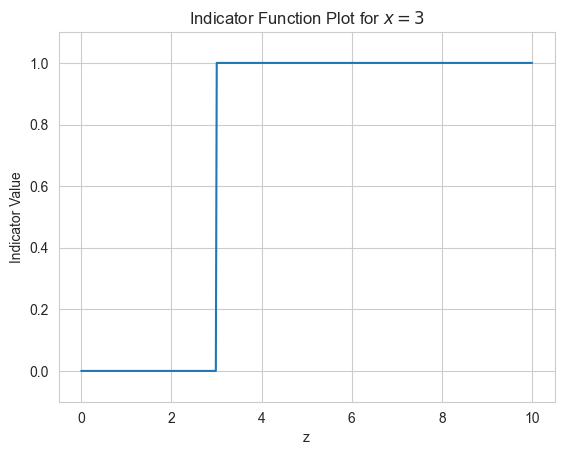

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

x_fixed = 3
grid = np.linspace(0, 10, 500)  # Example grid

def indicator(x, grid):
    return (x <= grid).astype(int)

F_x = indicator(x_fixed, grid)

sns.lineplot(x=grid, y=F_x)
plt.title(r'Indicator Function Plot for $x=3$')
plt.xlabel('z')
plt.ylabel('Indicator Value')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.show()

1 - I{x ≤ z} = 1 when x ≤ z, which means that the condition is true. In this case, 1 - I{x ≤ z} = 0, indicating that the condition x > z is false. This is a way to compute the opposite condition using the indicator function.

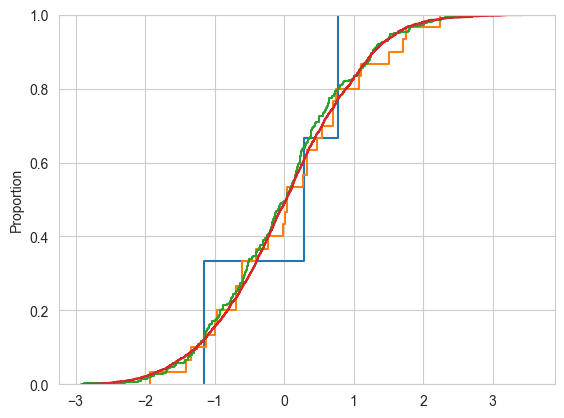

In [92]:
import numpy as np

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    sns.ecdfplot(X)


As the sample size N increases, the Empirical Cumulative Distribution Function (ECDF) becomes smoother and more closely approximates the true cumulative distribution function of the underlying population.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`.

In [93]:
def compute_quantile(data, q):
    sorted_data = np.sort(data)
    n = len(sorted_data)
    index = q * (n - 1)
    lower = int(np.floor(index))
    upper = int(np.ceil(index))

    if lower == upper:
        return sorted_data[lower]
    else:
        return (sorted_data[lower] + sorted_data[upper]) / 2

In [94]:
# Test the function
array = np.array([7, 15, 36, 39, 40, 41, 42, 43, 47, 49])

compute_quantile(array, 0.5)

40.5

In [95]:
def interquartile_range(data):
    q1 = compute_quantile(data, 0.25)
    q3 = compute_quantile(data, 0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    return iqr, lower_whisker, upper_whisker

In [96]:
# Testing the function
interquartile_range(array)

(5.0, 30.0, 50.0)

In [97]:
def five_number_summary(data):
    minimum = np.min(data)
    q1 = compute_quantile(data, 0.25)
    median = compute_quantile(data, 0.5)
    q3 = compute_quantile(data, 0.75)
    maximum = np.max(data)
    iqr, lower_whisker, upper_whisker = interquartile_range(data)
    return {
        'Minimum': minimum,
        'Q1': q1,
        'Median': median,
        'Q3': q3,
        'Maximum': maximum,
        'IQR': iqr,
        'Lower Whisker': lower_whisker,
        'Upper Whisker': upper_whisker
    }

In [98]:
five_number_summary(array)

{'Minimum': 7,
 'Q1': 37.5,
 'Median': 40.5,
 'Q3': 42.5,
 'Maximum': 49,
 'IQR': 5.0,
 'Lower Whisker': 30.0,
 'Upper Whisker': 50.0}

In [99]:
def identify_outliers(data):
    lower_whisker, upper_whisker = interquartile_range(data)[1:]
    return (data < lower_whisker) | (data > upper_whisker)

In [100]:
# Testing the function
identify_outliers(array)

array([ True,  True, False, False, False, False, False, False, False,
       False])

In [101]:
foreign_gifts = pd.read_csv("data/ForeignGifts_edu.csv", low_memory=False)

foreign_gifts_quantile = compute_quantile(foreign_gifts['Foreign Gift Amount'], 0.5)
foreign_gifts_iqr = interquartile_range(foreign_gifts['Foreign Gift Amount'])
foreign_gifts_summary = five_number_summary(foreign_gifts['Foreign Gift Amount'])
foreign_gifts_outliers = identify_outliers(foreign_gifts['Foreign Gift Amount'])

In [102]:
print("Quantile (0.5):", foreign_gifts_quantile)
print("IQR, Lower Whisker, Upper Whisker:", foreign_gifts_iqr)
print("Five Number Summary:", foreign_gifts_summary)
print("Outliers:", foreign_gifts_outliers)

Quantile (0.5): 94615
IQR, Lower Whisker, Upper Whisker: (370442, -549963.0, 931805.0)
Five Number Summary: {'Minimum': -537770, 'Q1': 5700, 'Median': 94615, 'Q3': 376142, 'Maximum': 99999999, 'IQR': 370442, 'Lower Whisker': -549963.0, 'Upper Whisker': 931805.0}
Outliers: 0        False
1        False
2         True
3        False
4        False
         ...  
28216    False
28217    False
28218     True
28219    False
28220     True
Name: Foreign Gift Amount, Length: 28221, dtype: bool


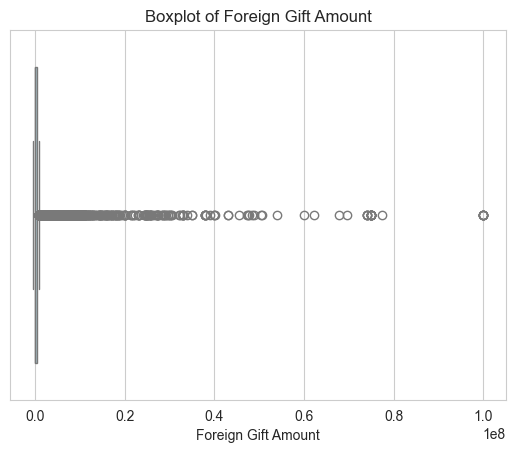

In [103]:
sns.boxplot(x=foreign_gifts['Foreign Gift Amount'], color='lightblue', orient='h')
plt.title('Boxplot of Foreign Gift Amount')
plt.xlabel('Foreign Gift Amount')
plt.show()

In [104]:
foreign_gifts['Foreign Gift Amount'].describe()

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

Did not do 5.

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?